In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from PIL import Image, ImageDraw
from datetime import datetime as dt
%matplotlib inline

In [3]:
'''Load Datset'''
train_df = pd.read_csv('./snake_csv_files/SnakeCLEF2023-TrainMetadata-iNat.csv')
val_df = pd.read_csv('./snake_csv_files/SnakeCLEF2023-ValMetadata.csv')
rare_df = pd.read_csv('./snake_csv_files/SnakeCLEF2023-TrainMetadata-HM.csv')

In [4]:
train_df.shape

(154301, 7)

In [5]:
print(val_df.shape)
print(rare_df.shape)

(14117, 8)
(13843, 7)


In [6]:
train_df.head()

,observation_id,endemic,binomial_name,code,image_path,class_id,subset
0,2670823,True,Zamenis lineatus,IT,1990/Zamenis_lineatus/3001242.jpg,1779,train
1,70108926,False,Xenoxybelis argenteus,VE,1990/Xenoxybelis_argenteus/113910655.jpg,1772,train
2,70108926,False,Xenoxybelis argenteus,VE,1990/Xenoxybelis_argenteus/113910659.jpg,1772,train
3,117935,False,Aspidelaps lubricus,ZA,1990/Aspidelaps_lubricus/168477.JPG,95,train
4,125284,False,Telescopus beetzi,ZA,1990/Telescopus_beetzi/177365.JPG,1606,train


In [7]:
train_df[train_df['class_id']==411].head()

,observation_id,endemic,binomial_name,code,image_path,class_id,subset
2648,71244592,False,Crotalus culminatus,MX,2007/Crotalus_culminatus/115959097.jpeg,411,train
2649,71244592,False,Crotalus culminatus,MX,2007/Crotalus_culminatus/115959131.jpeg,411,train
3770,73796450,False,Crotalus culminatus,MX,2008/Crotalus_culminatus/120529647.jpeg,411,train
6260,29135787,False,Crotalus culminatus,MX,2010/Crotalus_culminatus/45458354.jpeg,411,train
6261,29135788,False,Crotalus culminatus,MX,2010/Crotalus_culminatus/45458363.jpeg,411,train


In [8]:
'''Uniques Country/Region'''
np.set_printoptions(threshold=np.inf)
arr = train_df["code"].unique()
print(arr)

['IT' 'VE' 'ZA' 'unknown' 'US' 'RU' 'TH' 'BR' 'NL' 'CM' 'EC' 'HR' 'AM'
 'TZ' 'ZW' 'ET' 'CR' 'IN' 'BI' 'GY' 'MX' 'YE' 'MA' 'CZ' 'JO' 'PY' 'MG'
 'SN' 'DM' 'SZ' 'GR' 'PE' 'NI' 'BW' 'CA' 'BZ' 'BG' 'GB' 'BN' 'TT' 'BO'
 'GF' 'AU' 'HK' 'LB' 'PT' 'HN' 'MY' 'CL' 'GT' 'SG' 'FR' 'TW' 'ID' 'UG'
 'KG' 'KE' 'SV' 'KY' 'SK' 'LY' 'AW' 'OM' 'UY' 'CN' 'KZ' 'RS' 'ZM' 'KR'
 'NC' 'PA' 'AR' 'CF' 'TL' 'CU' 'ES' 'PG' 'LK' 'KH' 'CO' 'UA' 'NP' 'IQ'
 'RO' 'HU' 'BF' 'DZ' 'SB' 'LA' 'EE' 'DO' 'ME' 'VN' 'GI' 'NG' 'SR' 'JP'
 'GH' 'GE' 'TR' 'AZ' 'QA' 'MN' 'BQ' 'TD' 'EG' 'PH' 'GA' 'MR' 'TN' 'AE'
 'BS' 'SY' 'CH' 'PR' 'IR' 'BE' 'VU' 'EH' 'PK' 'WS' 'SC' 'MZ' 'RE' 'AO'
 'BJ' 'LT' 'MD' 'DE' 'BT' 'NO' 'SE' 'AT' 'SI' 'CG' 'GQ' 'GM' 'CY' 'IM'
 'HT' 'AL' 'VG' 'IL' 'GN' 'UZ' 'GW' 'LR' 'MM' 'CD' 'LV' 'TJ' 'MW' 'FJ'
 'ST' 'CI' 'AF' 'TG' 'RW' 'TO' 'JM' 'PL' 'SA' 'FI' 'GU' 'BA' 'BY' 'DK'
 'MK' 'MU' 'SL' 'AX' 'PW' 'GP' 'LS' 'NE' 'PS' 'YT' 'BD' 'SS' 'BL' 'VI'
 'MO' 'MV' 'NZ' 'VA' 'AD' 'ML' 'LU' 'SD' 'CX' 'MT' 'KW' 'AG' 'KP' 'XK'
 'TM' 

In [9]:
train_df["binomial_name"].unique().shape

(1784,)

In [10]:
train_df["class_id"].unique().shape

(1784,)

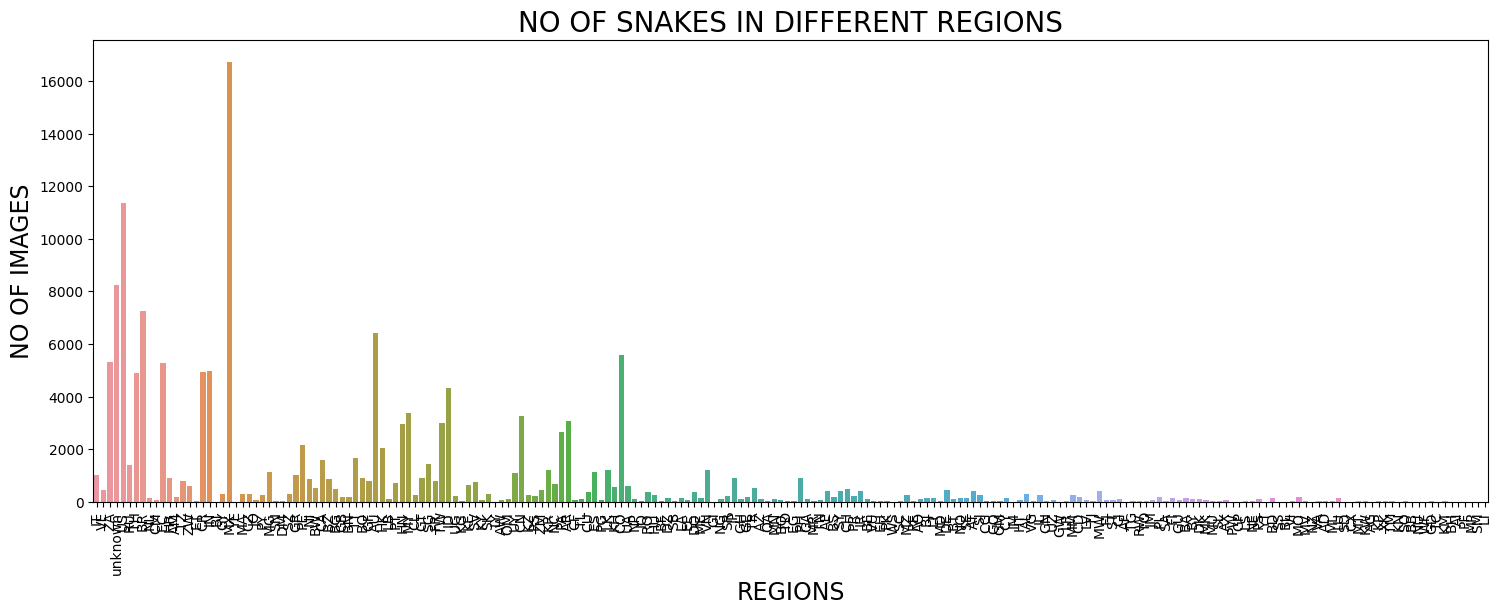

In [18]:
plt.figure(figsize=(18,6))
sns.countplot(x="code",data=train_df)
plt.xticks(rotation=90)
plt.title("NO OF SNAKES IN DIFFERENT REGIONS",size=20)
plt.xlabel("REGIONS",size=17)
plt.ylabel("NO OF IMAGES",size=17)
plt.show()

In [11]:
'''Count class_ids'''
df = train_df.groupby("class_id").binomial_name.count().nlargest(1784)


r_df = rare_df.groupby("class_id").binomial_name.count().nlargest(1784)

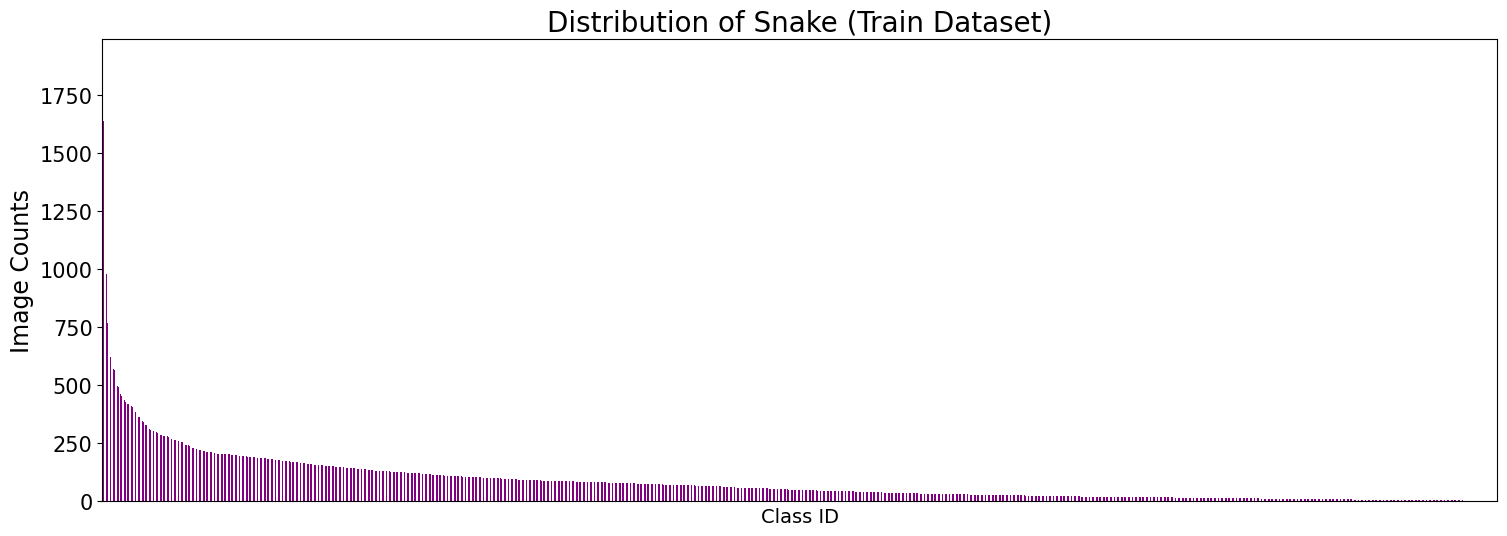

In [12]:
import seaborn as sns
plt.figure(figsize=(18,6))
ax=df.plot(kind="bar",fontsize = 15,color="purple")

# plt.xticks(rotation=90)
ax.set(xticks=([]))
plt.title("Distribution of Snake (Train Dataset)",size=20)
plt.xlabel("Class ID",size=14)
plt.ylabel("Image Counts",size=17)
plt.show()

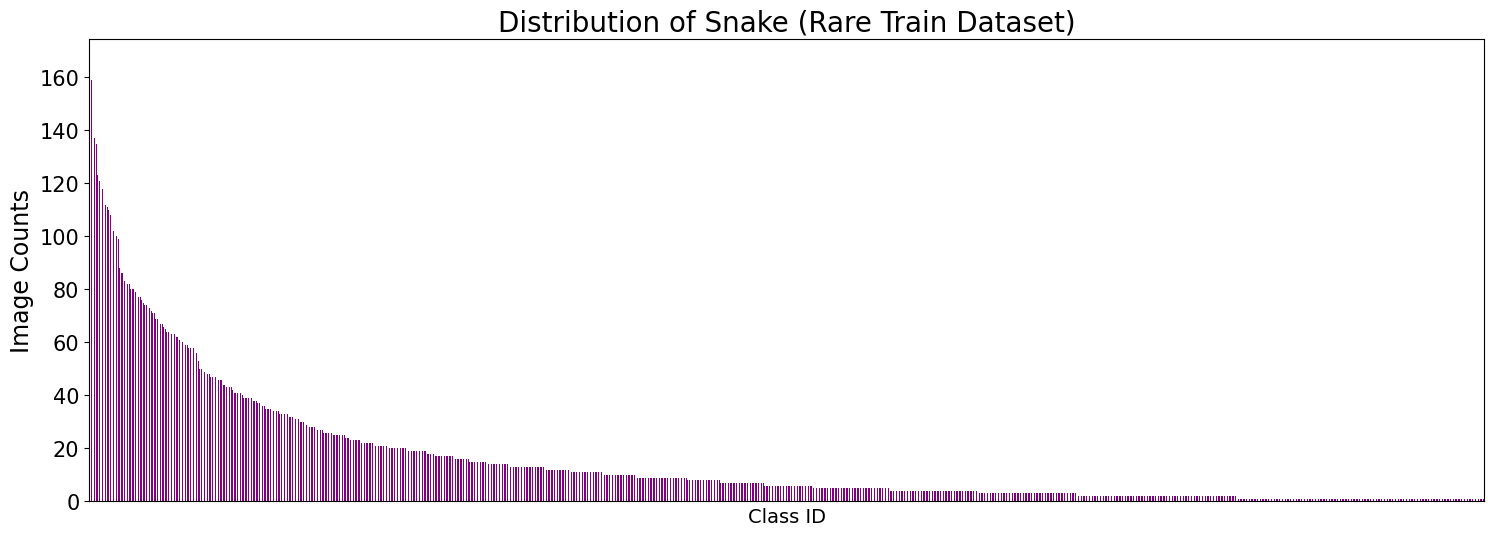

In [37]:
import seaborn as sns
plt.figure(figsize=(18,6))
ax=r_df.plot(kind="bar",fontsize = 15,color="purple")

# plt.xticks(rotation=90)
ax.set(xticks=([]))
plt.title("Distribution of Snake (Rare Train Dataset)",size=20)
plt.xlabel("Class ID",size=14)
plt.ylabel("Image Counts",size=17)
plt.show()

In [85]:
'''Plot images of same IDs to check variatio within the class'''

img_path = train_df[train_df['class_id']==1232][:40]['image_path'].tolist()

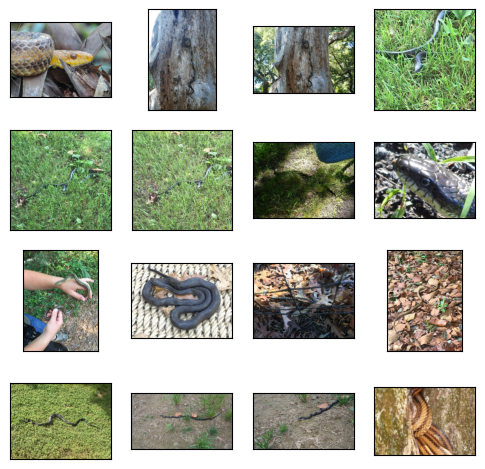

In [86]:
import numpy as np
import matplotlib.pyplot as plt

w = 15
h = 15
fig = plt.figure(figsize=(6, 6))
columns = 4
rows = 4

for i in range(1, columns*rows +1):
    img = Image.open('./SnakeCLEF2023-medium_size-train/'+img_path[i+1])
    fig.add_subplot(rows, columns, i)
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    plt.imshow(img)
plt.show()

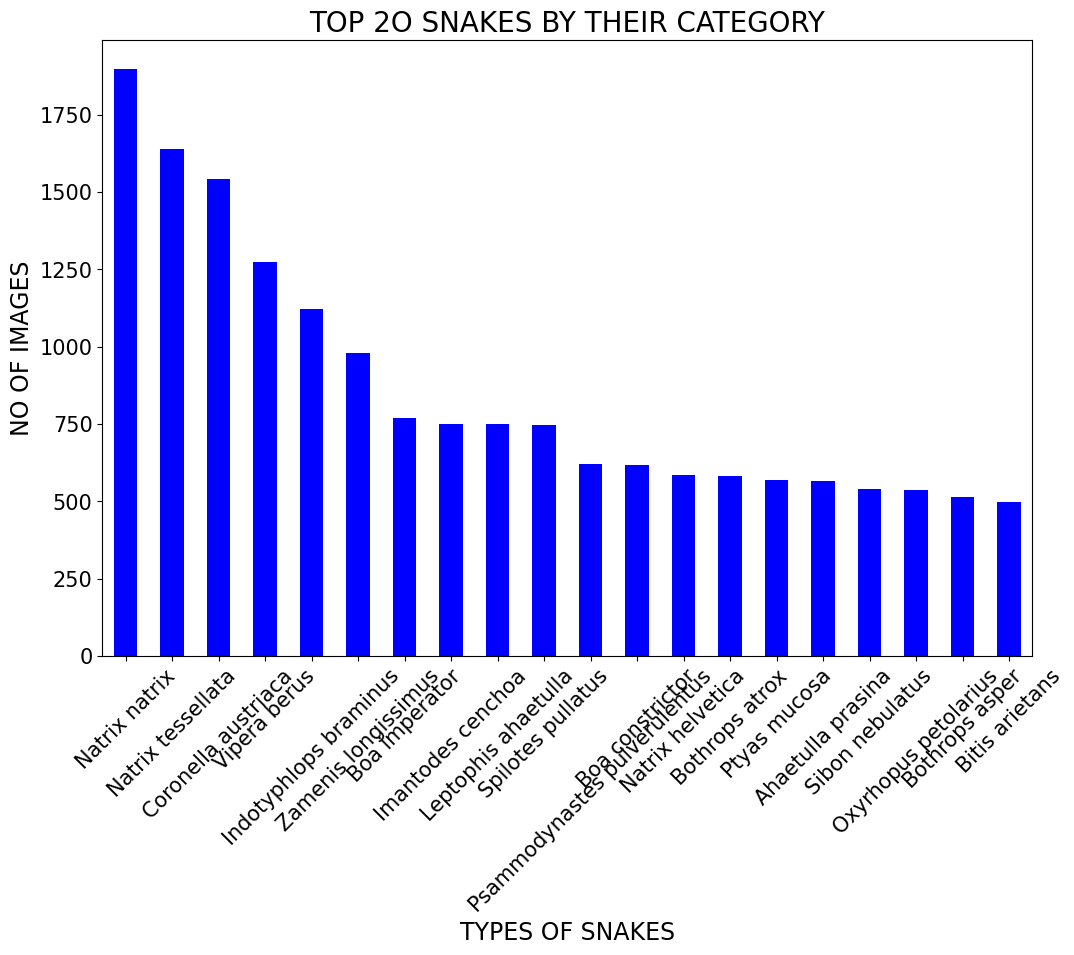

In [13]:
top_type_snakes = train_df.groupby("binomial_name").binomial_name.count().nlargest(n=20)

plt.figure(figsize=(12,8))
top_type_snakes.plot(kind="bar",fontsize = 15,color="blue")
plt.title("TOP 2O SNAKES BY THEIR CATEGORY",size=20)
plt.xticks(rotation=45)
plt.xlabel("TYPES OF SNAKES",size=17)
plt.ylabel("NO OF IMAGES",size=17)
plt.show()

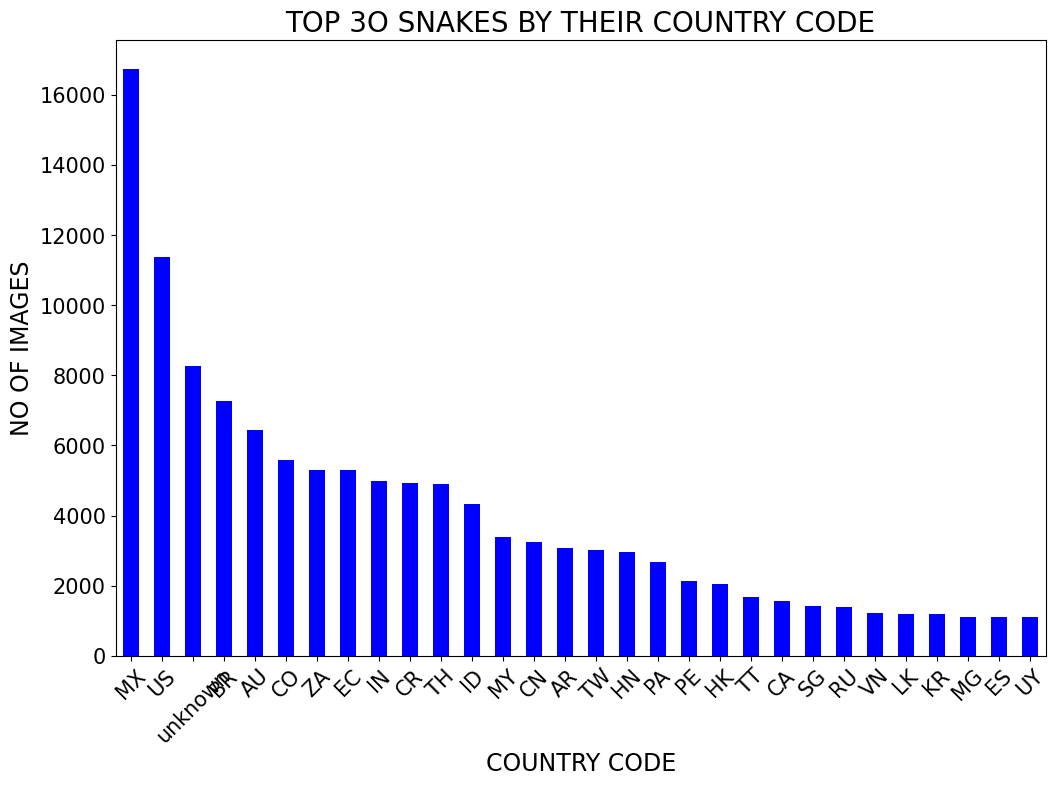

In [14]:
top_type_snakes = train_df.groupby("code").code.count().nlargest(n=30)

plt.figure(figsize=(12,8))
top_type_snakes.plot(kind="bar",fontsize = 15,color="blue")
plt.title("TOP 3O SNAKES BY THEIR COUNTRY CODE",size=20)
plt.xticks(rotation=45)
plt.xlabel("COUNTRY CODE",size=17)
plt.ylabel("NO OF IMAGES",size=17)
plt.show()

In [40]:
df = train_df.groupby(["endemic", "binomial_name", "code"]).endemic.count().reset_index(name='count') 

In [41]:
df

,endemic,binomial_name,code,count
0,False,Acanthophis antarcticus,AU,75
1,False,Acanthophis antarcticus,unknown,2
2,False,Acanthophis cryptamydros,AU,6
3,False,Acanthophis laevis,ID,14
4,False,Acanthophis laevis,PG,2
...,...,...,...,...
6098,True,Vipera walser,unknown,1
6099,True,Virginia valeriae,US,97
6100,True,Virginia valeriae,unknown,30
6101,True,Xylophis captaini,IN,11


In [43]:
df[df["endemic"]==True]

,endemic,binomial_name,code,count
5468,True,Achalinus formosanus,TW,37
5469,True,Achalinus niger,TW,77
5470,True,Achalinus niger,unknown,1
5471,True,Acrantophis dumerili,MG,69
5472,True,Acrantophis madagascariensis,MG,92
...,...,...,...,...
6098,True,Vipera walser,unknown,1
6099,True,Virginia valeriae,US,97
6100,True,Virginia valeriae,unknown,30
6101,True,Xylophis captaini,IN,11


In [44]:
df[df["endemic"]==True].shape

(635, 4)

In [45]:
df[df["endemic"]==True]["code"].unique()

array(['TW', 'unknown', 'MG', 'BS', 'US', 'MX', 'IN', 'LK', 'AG', 'AU',
       'CU', 'TZ', 'CO', 'EC', 'PE', 'DM', 'ST', 'PR', 'VG', 'VI', 'HN',
       'BR', 'DO', 'HT', 'JM', 'AW', 'KY', 'PH', 'PW', 'CA', 'JP', 'KR',
       'RU', 'BN', 'BT', 'CN', 'HK', 'ID', 'MM', 'MY', 'TH', 'VN', 'AR',
       'BD', 'KH', 'LA', 'NP', 'PK', 'BZ', 'PA', 'YT', 'SC', 'AM', 'AZ',
       'CY', 'GE', 'GR', 'IQ', 'IR', 'LB', 'SY', 'TR', 'UZ', 'AL', 'BA',
       'BG', 'DZ', 'HR', 'IL', 'IT', 'JO', 'PS', 'TN', 'GT', 'AT', 'BE',
       'CH', 'DE', 'ES', 'FR', 'GB', 'LI', 'LU', 'NL', 'VA', 'BL', 'ZA',
       'CL', 'SV', 'KP', 'AX', 'BY', 'CZ', 'DK', 'EE', 'FI', 'HU', 'IM',
       'KZ', 'LT', 'LV', 'ME', 'MK', 'MN', 'NO', 'PL', 'RO', 'SE', 'SI',
       'SK', 'UA', 'PT', 'MA'], dtype=object)

Text(0, 0.5, '# of training images')

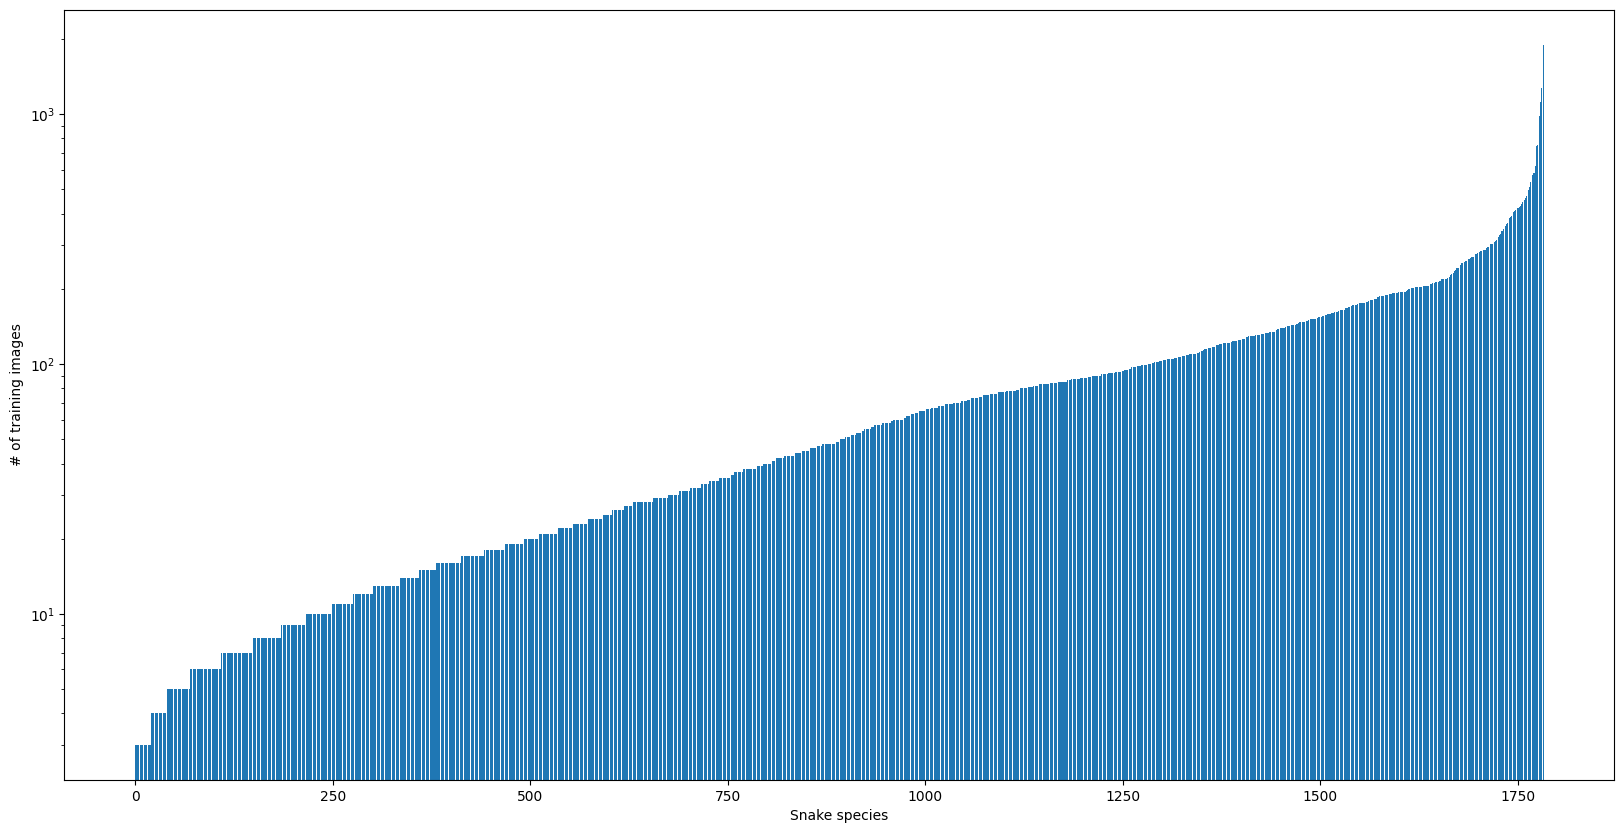

In [46]:
df_hist=train_df.groupby('class_id').count().sort_values('endemic').reset_index()
import matplotlib.pyplot as plt
width=20
height=10
plt.figure(figsize=(width,height))
plt.bar(df_hist.index, df_hist.endemic)
plt.yscale("log") 
plt.xlabel('Snake species')
plt.ylabel('# of training images')

In [53]:

# remove data ambiguity 

import os

In [103]:
val_df = pd.read_csv('SnakeCLEF2023-ValMetadata.csv')

ls = []
path = 'SnakeCLEF2023-medium_size-val'     #path to image folder to extract the names of image files
for root, dirs, files in os.walk(os.path.abspath(path)):
    for file in files:
        f = os.path.join(root, file)
        sl = f.split('/')
        ls.append(sl[-3]+'/'+sl[-2]+'/'+sl[-1])

#filter out images not in metafile

indexImAge = val_df[~val_df['image_path'].isin(ls)].index
val_df.drop(indexImAge , inplace=True)
val_df.shape
val_df.to_csv('snake_val_metadata_file.csv')

In [110]:
'''
Making of metric and Loss function

'''

venomous_df = pd.read_csv('venomous_status_list.csv')
venomous_df.head()

,class_id,MIVS
0,1779,0
1,1772,0
2,95,0
3,1606,0
4,561,0


In [111]:
venomous_df.shape

(1784, 2)

In [112]:
not_harmful_ls  = venomous_df[venomous_df["MIVS"]==0]["class_id"]
harmful_ls = venomous_df[venomous_df["MIVS"]==1]["class_id"]


In [117]:
not_harm = not_harmful_ls.values.tolist()
harm = harmful_ls.values.tolist()

In [115]:
def p(x):
    if x in [741, 857, 1736, 1118, 415, 154, 1530, 431, 1317, 1190, 159, 
                    224, 205, 1035, 221, 228, 412, 238, 1076, 1107, 113, 562, 1072, 1119, 237, 216, 248, 225, 429,
                     512, 1052, 443, 1714, 1066, 1749, 1734, 33, 421, 27, 1081, 601, 462, 600, 1093, 739, 1739, 1746, 
                     423, 1316, 211, 425, 223, 1073, 806, 1393, 1671, 1670, 442, 464, 1742, 218, 1528, 1737, 417, 1703, 3, 
                     1106, 1230, 1056, 247, 1452, 1650, 430, 1037, 1684, 437, 1125, 424, 1745, 427, 0, 301, 783, 4, 1121, 1115, 
                     1688, 1713, 1315, 1053, 5, 1669, 160, 112, 308, 1071, 433, 1735, 1094, 410, 214, 743, 243, 2, 419, 307, 233, 
                     6, 858, 1191, 151, 1651, 1686, 310, 245, 595, 596, 407, 405, 1090, 439, 1040, 409, 440, 434, 403, 1059, 1082, 1652, 
                     416, 1114, 1065, 1044, 1373, 110, 242, 1034, 511, 1068, 829, 1116, 1129, 222, 1666, 830, 422, 285, 828, 411, 257,
                      1192, 1088, 280, 420, 1370, 1391, 1042, 1126, 1113, 804, 510, 1041, 1529, 1158, 207, 1318, 1117, 406, 414, 209,
                       1313, 1668, 1060, 1108, 1046, 259, 208, 1112, 213, 1390, 1395, 1389, 1124, 309, 1063, 256, 1747, 418, 1376, 260, 
                       1653, 1109, 402, 1128, 1050, 279, 1127, 302, 215, 428, 1319, 1329, 599, 1120, 206, 1122, 1327, 470, 236, 1665, 597,
                        235, 1396, 232, 32, 152, 1330, 1061, 1674, 999, 1036, 29, 204, 855, 241, 261, 262, 1679, 226, 1662, 240, 1687, 229, 
                        1685, 1744, 1741, 1110, 1057, 805, 219, 244, 1328, 463, 413, 1663, 513, 1740, 1392, 598, 1123, 856, 249, 1048, 34, 
                        1382, 1383, 1033, 1, 234, 740, 1375, 465, 162, 1079, 212, 1049, 258, 30, 1229, 1087, 1682, 150, 1312, 1680, 1743,
                         114, 1314, 742, 1371, 217, 1091, 210, 1372, 1374, 1689]: return 1

    else: return 0


(285,)

In [43]:
'''
Load annotation csv creare via Label Studio..
'''

anno=pd.read_csv('anno.csv', sep="\t")
anno.head()

,annotation_id,label,created_at,lead_time,updated_at,id,image,annotator
0,1,"[{""x"":0.683356063983995,""y"":14.58491336561461,...",2023-05-03T08:35:26.041410Z,56.339,2023-05-03T08:35:30.989289Z,1,/data/upload/1/2f92951f-250558438.jpeg,1
1,2,"[{""x"":2.4600818303423817,""y"":27.95441728409466...",2023-05-03T08:36:43.074768Z,43.792,2023-05-03T08:37:11.299484Z,2,/data/upload/1/ab055879-250558444.jpeg,1


In [46]:
'''
if using LAbel Studio for manual label following conversion is used. 

'''

# x=list(eval(anno['label'].iloc[0]))[0]['x']
# y=list(eval(anno['label'].iloc[0]))[0]['y']
# w=list(eval(anno['label'].iloc[0]))[0]['width']
# h=list(eval(anno['label'].iloc[0]))[0]['height']

#label studio convert

# Convert Yolo bb to Coco bb
# x1 = x / 100.0 * im_width
# y1 = y / 100.0 * im_height
# wt = w / 100.0 * im_width
# ht = h / 100.0 * im_height

In [7]:
'''
As BBoxes of 2023 year of training set is labelled manually using RectLabel (Mac App) and saved as YOLO format. 
following code snippet is a way to convert bounding boxes from yolo to coco.
'''

def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return [x1, y1, w, h]


'''
Example

'''
'''
x=0.577000;y= 0.431081;w= 0.806000;h= 0.505405
  
'''

from PIL import Image
im = Image.open('./SnakeCLEF2023-medium_size-train/2023/Craspedocephalus_trigonocephalus/253736834.jpeg')
im_width, im_height=im.size
print(im_width, im_height)

x1,y1,x2,y2=yolo_to_coco(x,y,w,h, im_width, im_height)


In [8]:
img=im.crop((x1,y1, x1+x2,y1+x2))
img.show()

In [ ]:
'''
Images to be deleted from 2023 folder which is meaningless.
'''

'''
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Afrotyphlops_mucruso/252625813.jpeg

#check if there is another with same category (as it has only one image and we have to avoid label missing for avoiding error)
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Ahaetulla_farnsworthi/251341911.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Ahaetulla_prasina/250805027.jpeg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Ahaetulla_prasina/250805032.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Ahaetulla_prasina/251113447.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Ahaetulla_prasina/250805123.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Antaresia_maculosa/253320327.jpeg 

#check if there are other images (as it has only one image and we have to avoid label missing for avoiding error)
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Atheris_squamigera/250065293.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Atractus_zebrinus/251230826.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Boiruna_sertaneja/254371856.jpeg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothriechis_schlegelii/252308563.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothriechis_schlegelii/252308578.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothriechis_schlegelii/253130725.jpeg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothriechis_schlegelii/254140176.jpeg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406779.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406780.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406782.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406799.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406800.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Bothrops_atrox/252406801.jpg

snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Cubophis_vudii/251079646.jpg
snakeCLEF/SnakeCLEF2023-medium_size-train/2023/Protobothrops_mucrosquamatus/251812703.jpeg

'''


In [9]:
# merge bbox annotations dataframe with cleaned updates train dataframe 

'''
Just DataFrame processing
'''

In [32]:
df_anno = pd.read_csv('snake_csv_files/SnakeCLEF_bbox_annotations_train_val_rare.csv')
df_train_cleaned = pd.read_csv('snake_csv_files/SnakeCLEF2023-cleaned-metadata-train-update.csv')
df_valid_cleaned=pd.read_csv('snake_csv_files/snakeCLEF2023_cleaned_metadata_for_bbox_val.csv')
df_rare = pd.read_csv('snake_csv_files/SnakeCLEF2023-TrainMetadata-HM.csv')


In [33]:
df_train_cleaned = df_train_cleaned.drop(columns=['keep', 'image_file_path' ])
df_train_cleaned.drop("Unnamed: 0", axis=1, inplace=True)
df_train_cleaned=df_train_cleaned[['observation_id', 'binomial', 'image_path', 'subset', 'code', 'endemic', 'class_id']]
df_train_cleaned.head()

,observation_id,binomial,image_path,subset,code,endemic,class_id
0,2670823,Zamenis lineatus,1990/Zamenis_lineatus/3001242.jpg,train,IT,True,1779
1,70108926,Xenoxybelis argenteus,1990/Xenoxybelis_argenteus/113910655.jpg,train,VE,False,1772
2,70108926,Xenoxybelis argenteus,1990/Xenoxybelis_argenteus/113910659.jpg,train,VE,False,1772
3,117935,Aspidelaps lubricus,1990/Aspidelaps_lubricus/168477.JPG,train,ZA,False,95
4,125284,Telescopus beetzi,1990/Telescopus_beetzi/177365.JPG,train,ZA,False,1606


In [34]:
df_rare.columns = ['observation_id', 'binomial', 'image_path', 'subset', 'code', 'endemic', 'class_id']
df_rare.head()

,observation_id,binomial,image_path,subset,code,endemic,class_id
0,HM 1954,Thamnophis butleri,HMP/Thamnophis_butleri/2408.jpg,train-hm,US,False,1619
1,HM 1955,Thamnophis butleri,HMP/Thamnophis_butleri/2409.jpg,train-hm,US,False,1619
2,HM 23990,Thamnophis butleri,HMP/Thamnophis_butleri/39886.jpg,train-hm,US,False,1619
3,HM 23991,Thamnophis butleri,HMP/Thamnophis_butleri/39887.jpg,train-hm,US,False,1619
4,HM 23991,Thamnophis butleri,HMP/Thamnophis_butleri/39888.jpg,train-hm,US,False,1619


In [35]:
df_valid_cleaned = df_valid_cleaned.drop(columns=['keep', 'image_file_path' ])
df_valid_cleaned.drop("Unnamed: 0", axis=1, inplace=True)
df_valid_cleaned=df_valid_cleaned[['observation_id', 'binomial', 'image_path', 'subset', 'code', 'endemic', 'class_id']]
df_valid_cleaned.head()

,observation_id,binomial,image_path,subset,code,endemic,class_id
0,125279,Psammophis namibensis,SnakeCLEF2023-medium_size-val/1992/Psammophis_...,train,ZA,False,1347
1,2393541,Lampropeltis annulata,SnakeCLEF2023-medium_size-val/1993/Lampropelti...,train,US,False,861
2,122004,Atractus occipitoalbus,SnakeCLEF2023-medium_size-val/1994/Atractus_oc...,train,EC,False,136
3,117794,Psomophis genimaculatus,SnakeCLEF2023-medium_size-val/1995/Psomophis_g...,train,PY,False,1405
4,117810,Phalotris tricolor,SnakeCLEF2023-medium_size-val/1996/Phalotris_t...,train,PY,False,1260


In [36]:
df_cleaned=pd.concat([df_train_cleaned, df_rare, df_valid_cleaned], axis=0)

In [37]:
df_cleaned.head()

,observation_id,binomial,image_path,subset,code,endemic,class_id
0,2670823,Zamenis lineatus,1990/Zamenis_lineatus/3001242.jpg,train,IT,True,1779
1,70108926,Xenoxybelis argenteus,1990/Xenoxybelis_argenteus/113910655.jpg,train,VE,False,1772
2,70108926,Xenoxybelis argenteus,1990/Xenoxybelis_argenteus/113910659.jpg,train,VE,False,1772
3,117935,Aspidelaps lubricus,1990/Aspidelaps_lubricus/168477.JPG,train,ZA,False,95
4,125284,Telescopus beetzi,1990/Telescopus_beetzi/177365.JPG,train,ZA,False,1606


In [39]:
print(df_anno.shape)
df_anno.head()


(145381, 5)


,image_path,xmin,ymin,xmax,ymax
0,1990/Zamenis_lineatus/3001242.jpg,50,46,181,186
1,1990/Xenoxybelis_argenteus/113910655.jpg,94,25,200,200
2,1990/Xenoxybelis_argenteus/113910659.jpg,20,82,207,133
3,1990/Aspidelaps_lubricus/168477.JPG,29,90,199,172
4,1990/Telescopus_beetzi/177365.JPG,46,48,194,183


In [40]:
print(df_cleaned.shape)
df_cleaned.tail()

(145381, 7)


,observation_id,binomial,image_path,subset,code,endemic,class_id
10980,147822938,Laticauda laticaudata,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,train,TW,False,889
10981,147822938,Laticauda laticaudata,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,train,TW,False,889
10982,147822938,Laticauda laticaudata,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,train,TW,False,889
10983,147822938,Laticauda laticaudata,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,train,TW,False,889
10984,147822938,Laticauda laticaudata,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,train,TW,False,889


In [41]:
df_anno.drop_duplicates()
df_anno.shape

(145381, 5)

In [42]:
df_anno.tail()

,image_path,xmin,ymin,xmax,ymax
145376,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,29,75,192,204
145377,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,67,72,223,223
145378,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,23,59,140,223
145379,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,51,7,173,137
145380,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,44,74,185,147


In [43]:
new_df_anno =df_anno.drop_duplicates(subset='image_path', keep="last")
new_df_anno.shape

(145378, 5)

In [44]:
new_df_ = df_cleaned.drop_duplicates(subset='image_path', keep='last')
new_df_.shape

(145378, 7)

In [45]:
new_final_ = pd.merge(new_df_anno, new_df_, on='image_path')
new_final_.head()

,image_path,xmin,ymin,xmax,ymax,observation_id,binomial,subset,code,endemic,class_id
0,1990/Zamenis_lineatus/3001242.jpg,50,46,181,186,2670823,Zamenis lineatus,train,IT,True,1779
1,1990/Xenoxybelis_argenteus/113910655.jpg,94,25,200,200,70108926,Xenoxybelis argenteus,train,VE,False,1772
2,1990/Xenoxybelis_argenteus/113910659.jpg,20,82,207,133,70108926,Xenoxybelis argenteus,train,VE,False,1772
3,1990/Aspidelaps_lubricus/168477.JPG,29,90,199,172,117935,Aspidelaps lubricus,train,ZA,False,95
4,1990/Telescopus_beetzi/177365.JPG,46,48,194,183,125284,Telescopus beetzi,train,ZA,False,1606


In [46]:
# new_final_ = new_final_.drop(columns=['Unnamed: 0'])
new_final_.tail()

,image_path,xmin,ymin,xmax,ymax,observation_id,binomial,subset,code,endemic,class_id
145373,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,29,75,192,204,147822938,Laticauda laticaudata,train,TW,False,889
145374,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,67,72,223,223,147822938,Laticauda laticaudata,train,TW,False,889
145375,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,23,59,140,223,147822938,Laticauda laticaudata,train,TW,False,889
145376,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,51,7,173,137,147822938,Laticauda laticaudata,train,TW,False,889
145377,SnakeCLEF2023-medium_size-val/2023/Laticauda_l...,44,74,185,147,147822938,Laticauda laticaudata,train,TW,False,889


In [48]:
new_final_.to_csv('snakeCLEF2023_bbox_cleaned_train_validation_rare_metadata.csv')

In [47]:
new_final_.shape

(145378, 11)